<a href="https://colab.research.google.com/github/mohamedSalehMatar/ML-on-Steel-Factory-Power-Consumption-Dataset/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
import numpy as np



In [ ]:
datatest= pd.read_csv('/content/gdrive/MyDrive/Ml_project/test.csv')
#print(data1)

In [ ]:
datatrain= pd.read_csv('/content/gdrive/MyDrive/Ml_project/train.csv')
#print(data2)

In [ ]:
datatrain

,Id,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,1/1/2018 0:15,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,1/1/2018 0:30,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,1/1/2018 0:45,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,1/1/2018 1:00,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,1/1/2018 1:15,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,19/10/2018 14:45,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,19/10/2018 15:00,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,19/10/2018 15:15,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,19/10/2018 15:30,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


Task Management:

Mohamed Saleh -> Data Preprocessing ✔️

Mayar         -> Modeling

Arwaa         -> Fine tuning

---------------------------------------------------------------

Problems of this dataset:

1- WeekStatus, Day_of_week and Load_Type are all categorical ✔️
  - Load_Type -> label encoder
  - WeekStatus -> one hot
  - drop Day_of_week

2- missing numerical values ✔️

3- date ✔️

4- filling outliers with mean

5- duplicates ✔️

6- (potential problems)

In [ ]:
#transforming date to dt type
datatrain['date'] = pd.to_datetime(datatrain['date'])

#creating new columns for each date data
datatrain['year'] = datatrain['date'].dt.year
datatrain['month'] = datatrain['date'].dt.month
datatrain['day'] = datatrain['date'].dt.day

#droping the old date column and reordering the dataframe
datatrain = datatrain.drop(datatrain.columns[1], axis=1)
neworder = [
'Id'
,'year'
,'month'
,'day'
,'Lagging_Current_Reactive.Power_kVarh'
,'Leading_Current_Reactive_Power_kVarh'
,'CO2(tCO2)'
,'Lagging_Current_Power_Factor'
,'Leading_Current_Power_Factor'
,'NSM'
,'WeekStatus'
,'Day_of_week'
,'Load_Type'
,'Usage_kWh'
]
datatrain = datatrain[neworder]

#print(datatrain)

In [ ]:
datatrain

,Id,year,month,day,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1,2018,1,1,2.95,0.0,0.00,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,2,2018,1,1,4.46,0.0,0.00,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,3,2018,1,1,3.28,0.0,0.00,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,4,2018,1,1,3.56,0.0,0.00,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,5,2018,1,1,4.50,0.0,0.00,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27994,27995,2018,10,19,32.62,0.0,0.02,85.75,100.0,53100,Weekday,Friday,Maximum_Load,54.36
27995,27996,2018,10,19,35.46,0.0,0.03,84.76,100.0,54000,Weekday,Friday,Maximum_Load,56.63
27996,27997,2018,10,19,30.92,0.0,0.03,89.63,100.0,54900,Weekday,Friday,Maximum_Load,62.50
27997,27998,2018,10,19,58.18,0.0,0.04,83.89,100.0,55800,Weekday,Friday,Maximum_Load,89.68


<ipython-input-8-2faa5ce90880>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datatrain.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)


<Axes: >

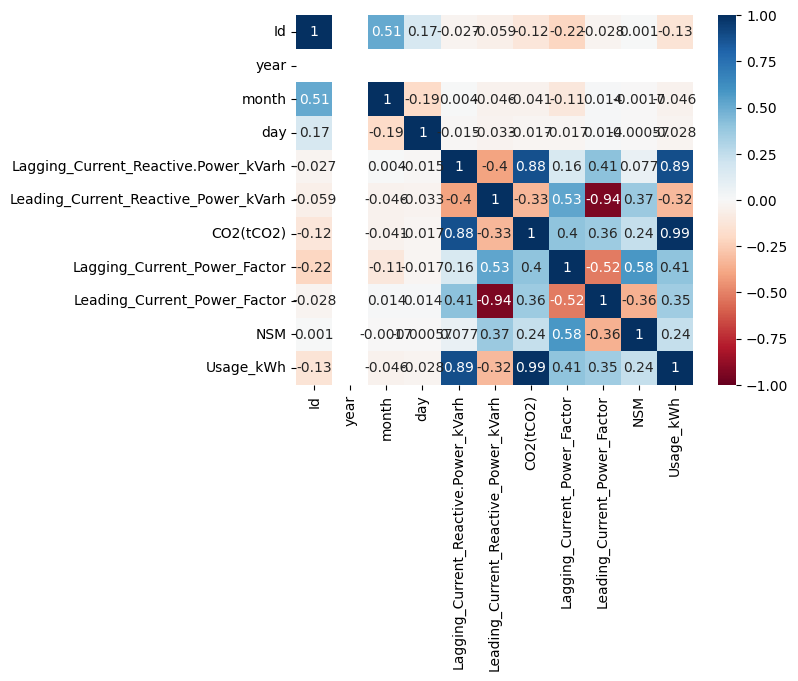

In [ ]:
sns.heatmap(datatrain.corr(), cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [ ]:
datatrain.duplicated().sum()

0

In [ ]:
#data null-value amout
datatrain.isnull().sum()

Id                                         0
year                                       0
month                                      0
day                                        0
Lagging_Current_Reactive.Power_kVarh       0
Leading_Current_Reactive_Power_kVarh     119
CO2(tCO2)                                  0
Lagging_Current_Power_Factor               0
Leading_Current_Power_Factor              76
NSM                                        0
WeekStatus                              1774
Day_of_week                             1774
Load_Type                                  0
Usage_kWh                                  0
dtype: int64

In [ ]:
#filling categorical null-value with mode

datatrain.iloc[:, 10:12] = datatrain.iloc[:, 10:12].fillna(datatrain.iloc[:, 10:12].mode().iloc[0])
datatrain.isnull().sum()

Id                                        0
year                                      0
month                                     0
day                                       0
Lagging_Current_Reactive.Power_kVarh      0
Leading_Current_Reactive_Power_kVarh    119
CO2(tCO2)                                 0
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor             76
NSM                                       0
WeekStatus                                0
Day_of_week                               0
Load_Type                                 0
Usage_kWh                                 0
dtype: int64

In [ ]:
numerical_features = datatrain.select_dtypes(include=['float', 'int']).columns

for feature in numerical_features:
    print(f'info of {feature} = ',datatrain[feature].describe())
    Q1 = np.percentile(datatrain[feature], 25, method='midpoint')
    Q3 = np.percentile(datatrain[feature], 75, method='midpoint')
    IQR = Q3 - Q1
    print(f'\nIQR of {feature} = ', IQR)

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f'Lower bound of {feature} = ', lower)
    print(f'Upper bound of {feature} = ', upper)

    # Replace the outliers with the feature mean
    datatrain.loc[(datatrain[feature] < lower) | (datatrain[feature] > upper), feature] = None

    print(f'\nOutliers of {feature} is no more.')

info of Id =  count    27999.00000
mean     14000.00000
std       8082.75943
min          1.00000
25%       7000.50000
50%      14000.00000
75%      20999.50000
max      27999.00000
Name: Id, dtype: float64

IQR of Id =  13999.0
Lower bound of Id =  -13998.0
Upper bound of Id =  41998.0

Outliers of Id is no more.
info of year =  count    27999.0
mean      2018.0
std          0.0
min       2018.0
25%       2018.0
50%       2018.0
75%       2018.0
max       2018.0
Name: year, dtype: float64

IQR of year =  0.0
Lower bound of year =  2018.0
Upper bound of year =  2018.0

Outliers of year is no more.
info of month =  count    27999.000000
mean         5.748420
std          3.097413
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: month, dtype: float64

IQR of month =  5.0
Lower bound of month =  -4.5
Upper bound of month =  15.5

Outliers of month is no more.
info of day =  count    27999.000000
mean        14.895853
std  

In [ ]:
datatrain.isnull().sum()

Id                                        0
year                                      0
month                                     0
day                                       0
Lagging_Current_Reactive.Power_kVarh    928
Leading_Current_Reactive_Power_kVarh    119
CO2(tCO2)                               370
Lagging_Current_Power_Factor              0
Leading_Current_Power_Factor             76
NSM                                       0
WeekStatus                                0
Day_of_week                               0
Load_Type                                 0
Usage_kWh                               277
dtype: int64

In [ ]:
#filling numerical null-value with mean

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(datatrain.iloc[:, [4, 5, 6, 8, 13]])
datatrain.iloc[:, [4, 5, 6, 8, 13]] = imputer.transform(datatrain.iloc[:, [4, 5, 6, 8, 13]])
datatrain.isnull().sum()

Id                                      0
year                                    0
month                                   0
day                                     0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
Usage_kWh                               0
dtype: int64

In [ ]:
#transforming categorical date into numeriacal ones

label_encoder = LabelEncoder()

# Fit and transform the data
encoded_load_types = label_encoder.fit_transform(datatrain['Load_Type'])
datatrain['Load_Type'] = encoded_load_types


In [ ]:
datatrain = pd.get_dummies(datatrain, columns = ['WeekStatus', 'Day_of_week'])

column_to_move = datatrain.pop("Usage_kWh")
datatrain.insert(len(datatrain.columns), "Usage_kWh", column_to_move)

In [ ]:
datatrain.head()

,Id,year,month,day,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,...,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Usage_kWh
0,1.0,2018.0,1.0,1.0,2.95,0.0,0.0,73.21,100.0,900.0,...,1,0,0,1,0,0,0,0,0,3.17
1,2.0,2018.0,1.0,1.0,4.46,0.0,0.0,66.77,100.0,1800.0,...,1,0,0,1,0,0,0,0,0,4.00
2,3.0,2018.0,1.0,1.0,3.28,0.0,0.0,70.28,100.0,2700.0,...,1,0,0,1,0,0,0,0,0,3.24
3,4.0,2018.0,1.0,1.0,3.56,0.0,0.0,68.09,100.0,3600.0,...,1,0,0,1,0,0,0,0,0,3.31
4,5.0,2018.0,1.0,1.0,4.50,0.0,0.0,64.72,100.0,4500.0,...,1,0,0,1,0,0,0,0,0,3.82


In [ ]:
datatrain.tail()

,Id,year,month,day,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,...,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Usage_kWh
27994,27995.0,2018.0,10.0,19.0,32.620000,0.0,0.02,85.75,100.0,53100.0,...,1,0,1,0,0,0,0,0,0,54.36
27995,27996.0,2018.0,10.0,19.0,35.460000,0.0,0.03,84.76,100.0,54000.0,...,1,0,1,0,0,0,0,0,0,56.63
27996,27997.0,2018.0,10.0,19.0,30.920000,0.0,0.03,89.63,100.0,54900.0,...,1,0,1,0,0,0,0,0,0,62.50
27997,27998.0,2018.0,10.0,19.0,11.587311,0.0,0.04,83.89,100.0,55800.0,...,1,0,1,0,0,0,0,0,0,89.68
27998,27999.0,2018.0,10.0,19.0,40.460000,0.0,0.03,83.51,100.0,56700.0,...,1,0,1,0,0,0,0,0,0,61.42


In [ ]:
#features
X = datatrain.iloc[:,:-1].values

#label
y = datatrain.iloc[:, -1].values

Validation MSE: [53.045330030024886, 53.41166513069808, 51.593792085218475, 50.49438071791527, 50.36743084221542], Train MSE: [39.869400655864816, 33.704025176750996, 58.358090155172526, 54.481281987646334, 60.51644334500995]
Training Accuracy: 0.951918663453762
Testing Accuracy: 0.9476032644067096


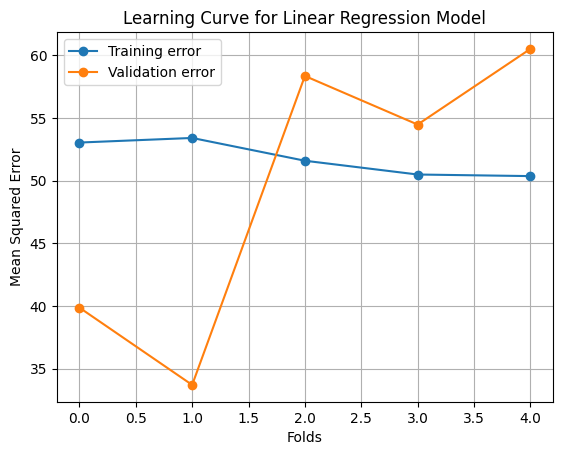

In [ ]:
# Linear Regression

train_errors, val_errors = [], []

# K-fold Cross-validation
# Split data into 20% Test and 80% Train
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

# Split 10% Validation, 10% Test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    lin = LinearRegression()
    lin.fit(X_train,y_train)

# Make predictions
    y_train_pred = lin.predict(X_train)
    y_val_pred = lin.predict(X_val)
    y_test_pred = lin.predict(X_test)

# Mean Squared Error
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

print(f'Validation MSE: {train_errors}, Train MSE: {val_errors}')

# Accuracy
print(f'Training Accuracy: {r2_score(y_train ,y_train_pred)}')
print(f'Testing Accuracy: {r2_score(y_test ,y_test_pred)}')

# Graph
plt.plot(train_errors, marker='o', label='Training error')
plt.plot(val_errors, marker='o', label='Validation error')
plt.xlabel('Folds')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()

Validation MSE: [37.80065235132128, 38.462468649388605, 37.89108370049623, 37.270786951757884, 37.05217112920708], Train MSE: [32.28509846974646, 25.849665748506034, 36.9217768266719, 38.03150276093511, 45.255588089913886]
Training Accuracy: 0.9646295655735724
Testing Accuracy: 0.964688939801984


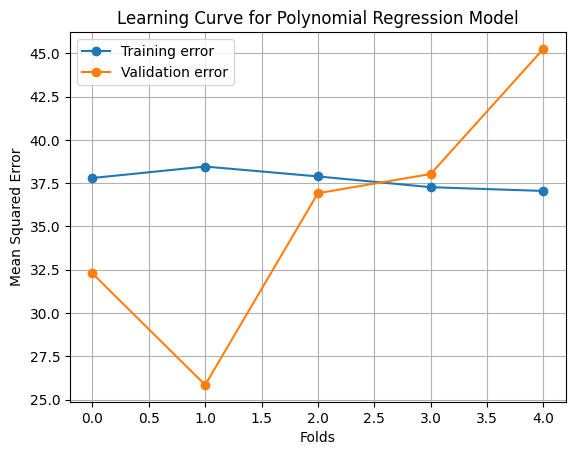

In [ ]:
# Polynomial Regression

train_errors, val_errors = [], []

# K-fold Cross-validation
# Split data into 20% Test and 80% Train
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

# Split 10% Validation, 10% Test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X_train)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

# Transform validation and test data
    X_val_poly = poly_features.transform(X_val)
    X_test_poly = poly_features.transform(X_test)

# Make predictions
    y_train_pred = poly_model.predict(X_train_poly)
    y_val_pred = poly_model.predict(X_val_poly)
    y_test_pred = poly_model.predict(X_test_poly)

# Mean Squared Error
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

print(f'Validation MSE: {train_errors}, Train MSE: {val_errors}')

# Accuracy
print(f'Training Accuracy: {r2_score(y_train ,y_train_pred)}')
print(f'Testing Accuracy: {r2_score(y_test ,y_test_pred)}')

# Graph
plt.plot(train_errors, marker='o', label='Training error')
plt.plot(val_errors, marker='o', label='Validation error')
plt.xlabel('Folds')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Polynomial Regression Model')
plt.legend()
plt.grid(True)
plt.show()

Validation MSE: [89.01436118119025, 89.14858761413997, 87.92310208675002, 86.74751446508833, 86.74687073348177], Train MSE: [77.95209406049734, 75.95915210804414, 91.05443882949008, 90.43181534801668, 92.72743709174765]
Training Accuracy: 0.9171904261081806
Testing Accuracy: 0.9164383897570576


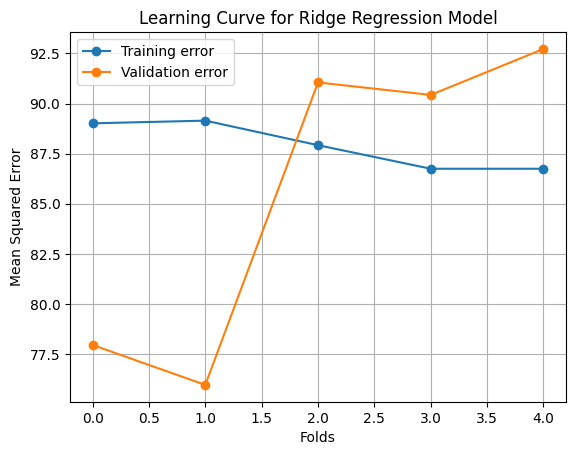

In [ ]:
 # Ridge Regression

train_errors, val_errors = [], []

# K-fold Cross-validation
# Split data into 20% Test and 80% Train
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

# Split 10% Validation, 10% Test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Implement Ridge regression model
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
# Make predictions
    y_train_pred = ridge.predict(X_train)
    y_val_pred = ridge.predict(X_val)
    y_test_pred = ridge.predict(X_test)

# Mean Squared Error
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

print(f'Validation MSE: {train_errors}, Train MSE: {val_errors}')

# Accuracy
print(f'Training Accuracy: {r2_score(y_train ,y_train_pred)}')
print(f'Testing Accuracy: {r2_score(y_test ,y_test_pred)}')

# Graph
plt.plot(train_errors, marker='o', label='Training error')
plt.plot(val_errors, marker='o', label='Validation error')
plt.xlabel('Folds')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Ridge Regression Model')
plt.legend()
plt.grid(True)
plt.show()

Validation MSE: [201.64220102338496, 201.51922667381265, 201.5516455000051, 200.69053486253438, 202.42190164470213], Train MSE: [190.5659924293263, 192.69488913379783, 201.7122837377624, 206.20392047879568, 199.82757659735978]
Training Accuracy: 0.8067656933346905
Testing Accuracy: 0.8112285579838684


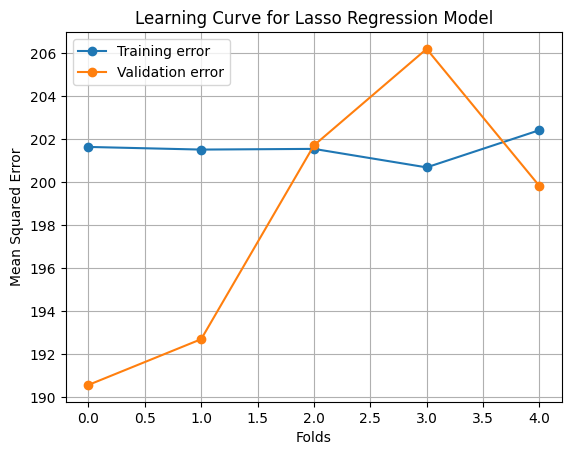

In [ ]:
# Lasso Regression

train_errors, val_errors = [], []

# K-fold Cross-validation
# Split data into 20% Test and 80% Train
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    X_train, X_temp = X[train_index], X[test_index]
    y_train, y_temp = y[train_index], y[test_index]

    # Split 10% Validation, 10% Test
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Fit the Lasso model on the training data
    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(X_train, y_train)

# Make predictions
    y_train_pred = lasso_model.predict(X_train)
    y_val_pred = lasso_model.predict(X_val)
    y_test_pred = lasso_model.predict(X_test)

# Mean Squared Error
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))

print(f'Validation MSE: {train_errors}, Train MSE: {val_errors}')

# Accuracy
print(f'Training Accuracy: {r2_score(y_train ,y_train_pred)}')
print(f'Testing Accuracy: {r2_score(y_test ,y_test_pred)}')

# Graph
plt.plot(train_errors, marker='o', label='Training error')
plt.plot(val_errors, marker='o', label='Validation error')
plt.xlabel('Folds')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Lasso Regression Model')
plt.legend()
plt.grid(True)
plt.show()

Validation MSE for different alphas: [51.6720990590361, 49.41995132610511]
Best alpha: 0.001
Training Accuracy: 0.9518980059280964
Testing Accuracy: 0.9476508237955878


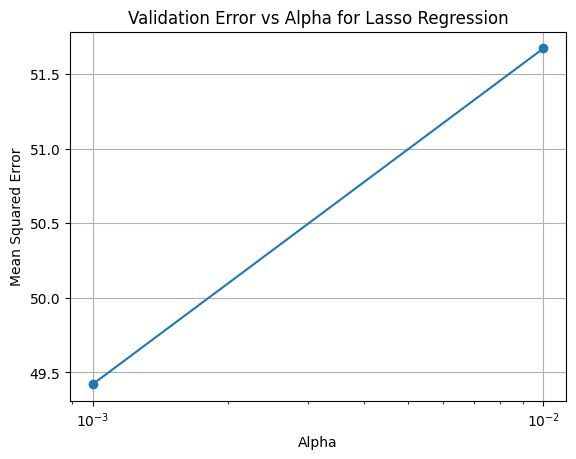

In [ ]:
# Hyperparameter Tuning for Lasso Regresssion

train_errors, val_errors = [], []
alphas = [0.01, 0.001]  # Values of alpha

# K-fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas:
    val_error_avg = 0
    for train_index, test_index in kf.split(X):
        X_train, X_temp = X[train_index], X[test_index]
        y_train, y_temp = y[train_index], y[test_index]

        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train, y_train)

        y_val_pred = lasso_model.predict(X_val)

        val_error_avg += mean_squared_error(y_val, y_val_pred)

    val_errors.append(val_error_avg / kf.get_n_splits())

best_alpha = alphas[np.argmin(val_errors)]

print(f'Validation MSE for different alphas: {val_errors}')
print(f'Best alpha: {best_alpha}')

# Train the model with the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Accuracy
print(f'Training Accuracy: {r2_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {r2_score(y_test, y_test_pred)}')

# Graph
plt.plot(alphas, val_errors, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Validation Error vs Alpha for Lasso Regression')
plt.xscale('log')
plt.grid(True)
plt.show()


Validation MSE for different alphas: [51.6720990590361, 49.41995132610511]
Best alpha: 0.001
Training Accuracy: 0.9518980059280964
Testing Accuracy: 0.9476508237955878


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+05, tolerance: 2.506e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+05, tolerance: 2.506e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+05, tolerance: 2.506e

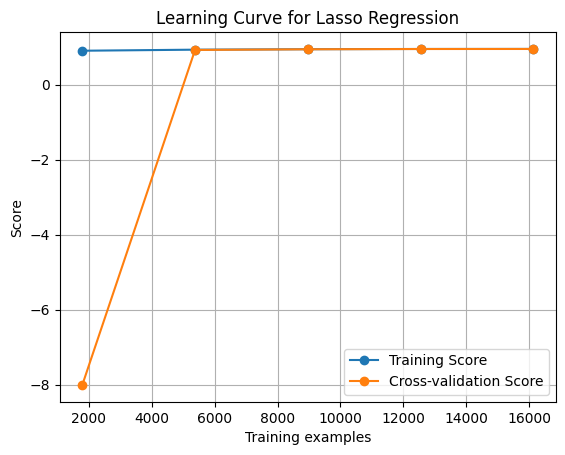

In [ ]:
# Hyperparameter Tuning for Lasso Regression

from sklearn.model_selection import learning_curve

train_errors, val_errors = [], []
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]  # Different training set sizes
alphas = [0.01, 0.001]  # Values of alpha

# K-fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas:
    val_error_avg = 0
    for train_index, test_index in kf.split(X):
        X_train, X_temp = X[train_index], X[test_index]
        y_train, y_temp = y[train_index], y[test_index]

        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train, y_train)

        y_val_pred = lasso_model.predict(X_val)

        val_error_avg += mean_squared_error(y_val, y_val_pred)

    val_errors.append(val_error_avg / kf.get_n_splits())

best_alpha = alphas[np.argmin(val_errors)]

print(f'Validation MSE for different alphas: {val_errors}')
print(f'Best alpha: {best_alpha}')

# Train the model with the best alpha
lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Accuracy
print(f'Training Accuracy: {r2_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {r2_score(y_test, y_test_pred)}')

# Learning Curve
train_sizes_abs, train_scores, val_scores = learning_curve(lasso_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes_abs, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes_abs, np.mean(val_scores, axis=1), 'o-', label='Cross-validation Score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve for Lasso Regression')
plt.legend()
plt.grid(True)
plt.show()


Validation MSE: [0.03151728063278799, 0.03560702981646853, 0.03002431354556862, 0.028663374406137105, 0.03218008031194698]
Train MSE: [0.05931821714099872, 0.02938372416925248, 0.046531303737927056, 0.030194747561056997, 0.07913041708259981]
Training Accuracy: 0.9522028719451225
Testing Accuracy: 0.947963177087143


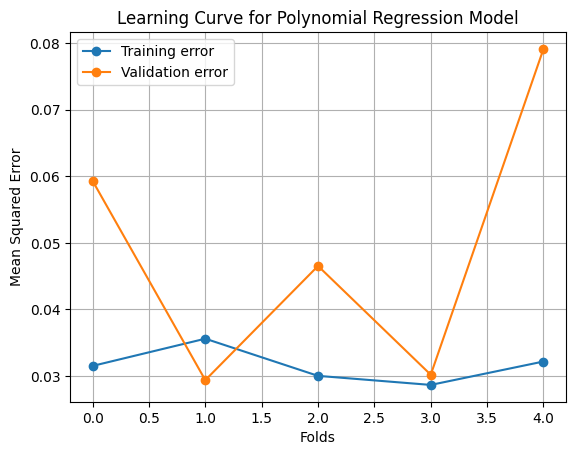

In [ ]:
# # Hyperparameter in Poyonimial Regression
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split, KFold, GridSearchCV
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Load dataset
# iris = load_iris()
# X = iris.data
# y = iris.target

# # K-fold Cross-validation
# # Split data into 20% Test and 80% Train
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# train_errors, val_errors = [], []

# # Define the polynomial regression model
# poly_model = LinearRegression()

# # Define the grid of hyperparameters to search
# param_grid = {
#      'degree': [0.001]  # No need for this since we handle polynomial features separately
# }

# # Perform the grid search with cross-validation
# # grid_search = GridSearchCV(estimator=poly_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

# for train_index, test_index in kf.split(X):
#     X_train, X_temp = X[train_index], X[test_index]
#     y_train, y_temp = y[train_index], y[test_index]

#     # Split 10% Validation, 10% Test
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#     # Create polynomial features
#     poly_features = PolynomialFeatures(degree=2)  # Choose the degree of polynomial features
#     X_train_poly = poly_features.fit_transform(X_train)
#     X_val_poly = poly_features.transform(X_val)
#     X_test_poly = poly_features.transform(X_test)

#     # Train the model
#     poly_model.fit(X_train_poly, y_train)

#     # Make predictions
#     y_train_pred = poly_model.predict(X_train_poly)
#     y_val_pred = poly_model.predict(X_val_poly)
#     y_test_pred = poly_model.predict(X_test_poly)

#     # Calculate errors
#     train_errors.append(mean_squared_error(y_train, y_train_pred))
#     val_errors.append(mean_squared_error(y_val, y_val_pred))

# # Print results
# print(f'Validation MSE: {train_errors}')
# print(f'Train MSE: {val_errors}')
# # Accuracy
# print(f'Training Accuracy: {r2_score(y_train ,y_train_pred)}')
# print(f'Testing Accuracy: {r2_score(y_test ,y_test_pred)}')

# # Graph
# plt.plot(train_errors, marker='o', label='Training error')
# plt.plot(val_errors, marker='o', label='Validation error')
# plt.xlabel('Folds')
# plt.ylabel('Mean Squared Error')
# plt.title('Learning Curve for Polynomial Regression Model')
# plt.legend()
# plt.grid(True)
# plt.show()


Alpha: 1e-216, Training MSE: 460.66725454263695, Validation MSE: 459.81047814891264
Training Accuracy: 0.9516850930080683
Testing Accuracy: 0.9476508237955878
Best alpha: 1e-216


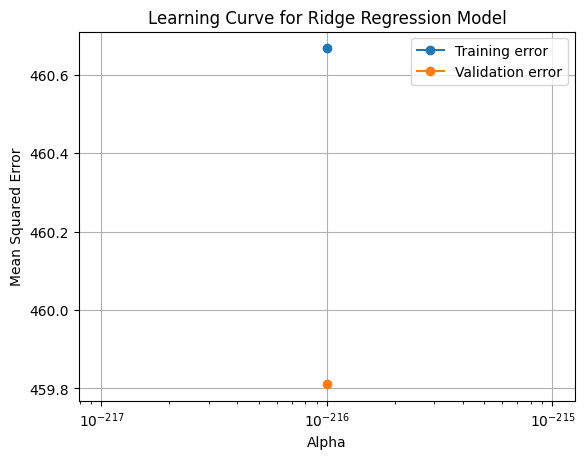

In [ ]:
# # Hyperparameter in Linear Regression
# from sklearn.model_selection import KFold, train_test_split
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import matplotlib.pyplot as plt

# # Initialize lists to store errors
# train_errors = []
# val_errors = []
# alphas = [1e-216]  # Example values for alpha to tune

# # K-fold Cross-validation
# # Split data into 20% Test and 80% Train
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# for alpha in alphas:
#     fold_train_errors = []
#     fold_val_errors = []
#     for train_index, test_index in kf.split(X):
#         X_train, X_temp = X[train_index], X[test_index]
#         y_train, y_temp = y[train_index], y[test_index]

#         # Split 10% Validation, 10% Test
#         X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#         # Implement Ridge regression model
#         ridge = Ridge(alpha=alpha)
#         ridge.fit(X_train, y_train)

#         # Make predictions
#         y_train_pred = ridge.predict(X_train)
#         y_val_pred = ridge.predict(X_val)

#         # Compute Mean Squared Error
#         fold_train_errors.append(mean_squared_error(y_train, y_train_pred))
#         fold_val_errors.append(mean_squared_error(y_val, y_val_pred))

#     # Average errors across folds
#     train_errors.append(np.mean(fold_train_errors))
#     val_errors.append(np.mean(fold_val_errors))

# # Print the MSE for different alphas
# for alpha, train_error, val_error in zip(alphas, train_errors, val_errors):
#     print(f"Alpha: {alpha}, Training MSE: {train_error}, Validation MSE: {val_error}")



# # Accuracy
# print(f'Training Accuracy: {r2_score(y_train ,y_train_pred)}')
# print(f'Testing Accuracy: {r2_score(y_test ,y_test_pred)}')

# # Find the alpha with minimum validation error
# best_alpha = alphas[np.argmin(val_errors)]
# print(f"Best alpha: {best_alpha}")

# # Plot the learning curves
# plt.plot(alphas, train_errors, marker='o', label='Training error')
# plt.plot(alphas, val_errors, marker='o', label='Validation error')
# plt.xscale('log')  # Use log scale for better visualization of alpha
# plt.xlabel('Alpha')
# plt.ylabel('Mean Squared Error')
# plt.title('Learning Curve for Ridge Regression Model')
# plt.legend()
# plt.grid(True)
# plt.show()
